In [1]:
# 3 Trends

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sb
import tweepy
import numpy as np

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import access_token, consumer_key, consumer_secret, access_token_secret 

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of BBC News
bbc_target_user = "@BBCNews"

# Counter
counter = 1

# Variables for holding sentiments
bbc_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(bbc_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        bbc_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [5]:
# Convert sentiments to DataFrame
bbc_sentiments_df = pd.DataFrame(bbc_sentiments)
bbc_sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.7717,Sun Apr 08 18:48:06 +0000 2018,0.511,0.489,0.000,1
1,0.7003,Sun Apr 08 18:20:16 +0000 2018,0.746,0.000,0.254,2
2,-0.8720,Sun Apr 08 18:11:22 +0000 2018,0.447,0.553,0.000,3
3,0.0000,Sun Apr 08 15:51:58 +0000 2018,1.000,0.000,0.000,4
4,-0.4588,Sun Apr 08 15:46:10 +0000 2018,0.769,0.231,0.000,5


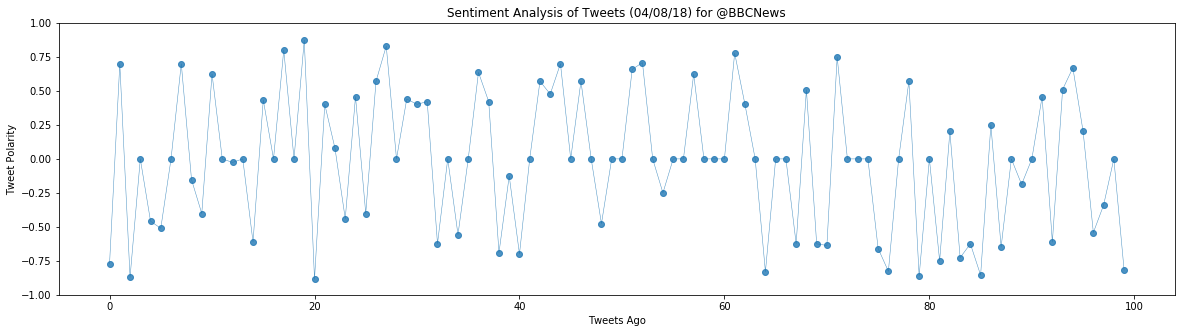

In [6]:
# Set parameters and create BBC plot
plt.figure(figsize=(20,5))
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), bbc_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.plot(np.arange(len(bbc_sentiments_df["Compound"])),
         bbc_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# Save the figure as png image 
plt.savefig("bbc_tweet_sentiment.png")

# Display graph
plt.show()

In [7]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of CBS News
cbs_target_user = "@CBSNews"

# Counter
counter = 1

# Variables for holding sentiments
cbs_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(cbs_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        cbs_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [8]:
# Convert sentiments to DataFrame
cbs_sentiments_df = pd.DataFrame(cbs_sentiments)
cbs_sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.2263,Sun Apr 08 21:45:29 +0000 2018,0.788,0.084,0.128,1
1,-0.3071,Sun Apr 08 21:31:01 +0000 2018,0.736,0.198,0.065,2
2,0.0000,Sun Apr 08 21:25:37 +0000 2018,1.000,0.000,0.000,3
3,0.0000,Sun Apr 08 21:05:57 +0000 2018,1.000,0.000,0.000,4
4,0.4939,Sun Apr 08 20:45:36 +0000 2018,0.856,0.000,0.144,5


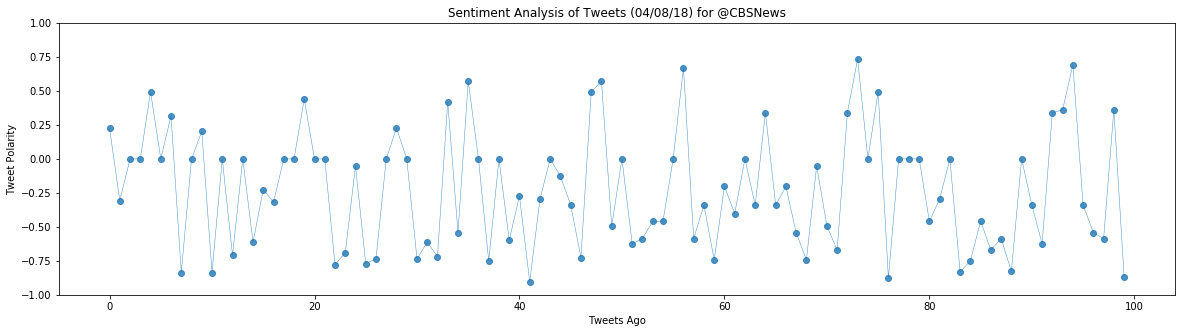

In [9]:
# Set parameters and create CBS plot
plt.figure(figsize=(20,5))
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), cbs_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.plot(np.arange(len(cbs_sentiments_df["Compound"])),
         cbs_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# Save the figure as png image 
plt.savefig("cbs_tweet_sentiment.png")

# Display graph
plt.show()

In [10]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of CNN
cnn_target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
cnn_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(cnn_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        cnn_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [11]:
# Convert sentiments to DataFrame
cnn_sentiments_df = pd.DataFrame(cnn_sentiments)
cnn_sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.7717,Sun Apr 08 22:00:10 +0000 2018,0.573,0.427,0.000,1
1,-0.4019,Sun Apr 08 21:45:04 +0000 2018,0.803,0.197,0.000,2
2,0.6588,Sun Apr 08 21:30:04 +0000 2018,0.761,0.000,0.239,3
3,0.0000,Sun Apr 08 21:15:07 +0000 2018,1.000,0.000,0.000,4
4,0.0000,Sun Apr 08 21:00:07 +0000 2018,1.000,0.000,0.000,5


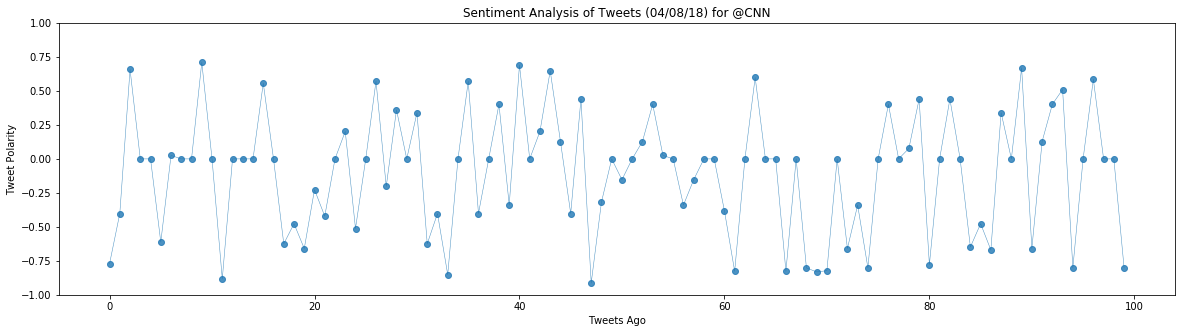

In [12]:
# Set parameters and create CNN plot
plt.figure(figsize=(20,5))
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), cnn_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.plot(np.arange(len(cnn_sentiments_df["Compound"])),
         cnn_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# Save the figure as png image 
plt.savefig("cnn_tweet_sentiment.png")

# Display graph
plt.show()

In [13]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of Fox News
fox_target_user = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments
fox_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(fox_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        fox_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


In [14]:
# Convert sentiments to DataFrame
fox_sentiments_df = pd.DataFrame(fox_sentiments)
fox_sentiments_df.head()
# Could convert date using date time library

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.4939,Sun Apr 08 22:04:18 +0000 2018,0.494,0.352,0.154,1
1,-0.5574,Sun Apr 08 22:02:00 +0000 2018,0.795,0.205,0.000,2
2,-0.4404,Sun Apr 08 21:53:00 +0000 2018,0.838,0.162,0.000,3
3,0.0000,Sun Apr 08 21:44:06 +0000 2018,1.000,0.000,0.000,4
4,0.4588,Sun Apr 08 21:42:00 +0000 2018,0.842,0.000,0.158,5


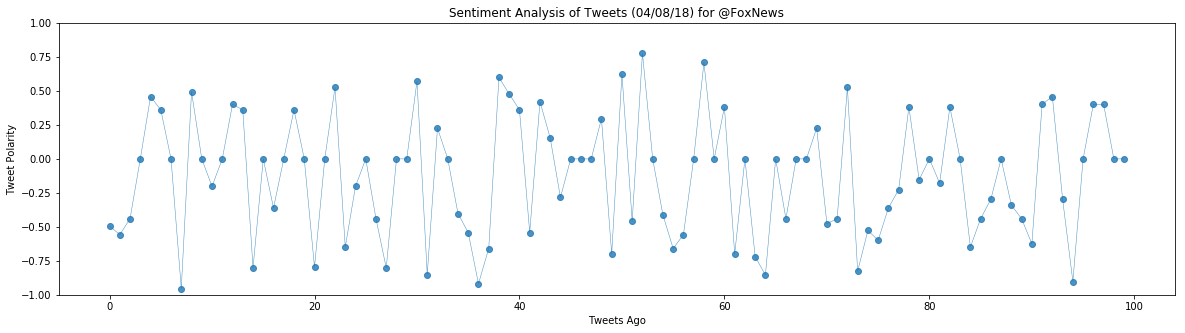

In [15]:
# Set parameters and create Fox plot
plt.figure(figsize=(20,5))
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), fox_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.plot(np.arange(len(fox_sentiments_df["Compound"])),
         fox_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# Save the figure as png image 
plt.savefig("fox_tweet_sentiment.png")

# Display graph
plt.show()

In [16]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of New York Times

# Target Account
nyt_target_user = "@NYTimes"

# Counter
counter = 1

# Variables for holding sentiments
nyt_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(fox_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        nyt_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [17]:
# Convert sentiments to DataFrame
nyt_sentiments_df = pd.DataFrame(nyt_sentiments)
nyt_sentiments_df.head()
# Could convert date using date time library

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.4939,Sun Apr 08 22:04:18 +0000 2018,0.494,0.352,0.154,1
1,-0.5574,Sun Apr 08 22:02:00 +0000 2018,0.795,0.205,0.000,2
2,-0.4404,Sun Apr 08 21:53:00 +0000 2018,0.838,0.162,0.000,3
3,0.0000,Sun Apr 08 21:44:06 +0000 2018,1.000,0.000,0.000,4
4,0.4588,Sun Apr 08 21:42:00 +0000 2018,0.842,0.000,0.158,5


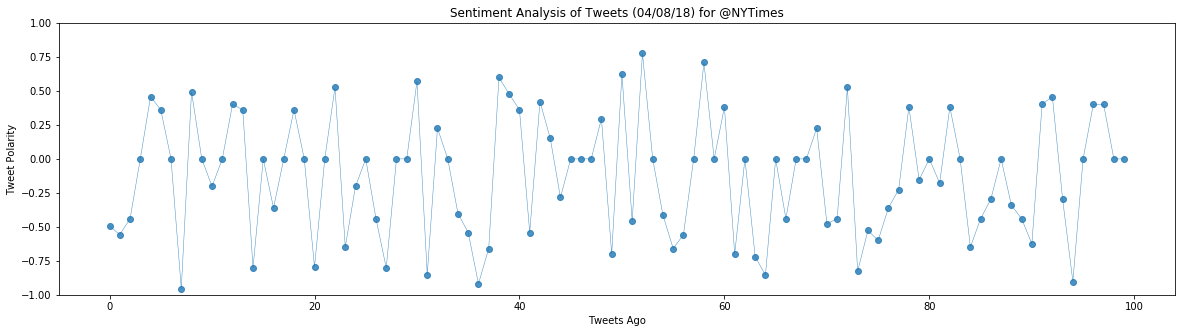

In [18]:
# Set parameters and create New York Times plot
plt.figure(figsize=(20,5))
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), nyt_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.plot(np.arange(len(nyt_sentiments_df["Compound"])),
         nyt_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# Save the figure as png image 
plt.savefig("nyt_tweet_sentiment.png")

# Display graph
plt.show()

In [19]:
#The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. 
#aggregate the compound sentiments analyzed by VADER.
nyt_compound_avg = nyt_sentiments_df["Compound"].mean()
nyt_compound_avg

-0.12436300000000002

In [20]:
bbc_compound_avg = bbc_sentiments_df["Compound"].mean()
bbc_compound_avg


-0.017182000000000003

In [21]:
cbs_compound_avg = cbs_sentiments_df["Compound"].mean()
cbs_compound_avg


-0.22535600000000003

In [22]:
fox_compound_avg = fox_sentiments_df["Compound"].mean()
fox_compound_avg


-0.12436300000000002

In [23]:
cnn_compound_avg = cnn_sentiments_df["Compound"].mean()
cnn_compound_avg

-0.10162099999999999

In [24]:
# Create dataframe for all compound sentiments
compound_data = {'nyt':[nyt_compound_avg], 'bbc':[bbc_compound_avg], 'cbs':[cbs_compound_avg], 'fox':[fox_compound_avg], 'cnn':[cnn_compound_avg]}
compound_df = pd.DataFrame(data=compound_data)
compound_df


,bbc,cbs,cnn,fox,nyt
0,-0.017182,-0.225356,-0.101621,-0.124363,-0.124363


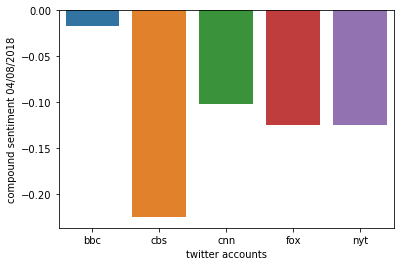

In [30]:
# Create Seaborn bar plot for compound twitter sentiment
ax = sb.barplot(data=compound_df)
ax.set(xlabel='twitter accounts', ylabel='compound sentiment 04/08/2018')
# Save the figure as png image 
plt.savefig("compound_sentiment.png")

# Display the graph
plt.show()

In [27]:
# Seaborn bubble plot 
# sb.regplot(data=)